# Implement and validate of the Naïve Bayes algorithm for classification.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import *
%matplotlib inline

In [23]:
df = pd.read_csv('Data_Naive_Bayes.csv')

In [24]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


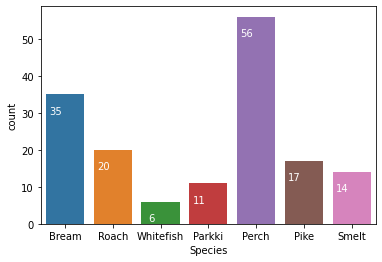

In [26]:
df1 = sns.countplot(x='Species',data=df)
for p in df1.patches:
    df1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
plt.show()

In [27]:
smap = {'Perch':0,'Bream':1,'Roach':2,'Pike':3,'Smelt':4,'Parkki':5,'Whitefish':6}
df['Species'] = df['Species'].map(smap)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
# converting X & Y to numpy arrays
X = df.to_numpy()
y = df['Species'].to_numpy()

from sklearn.model_selection import train_test_split
# Splitting into train & test sets (i.e,80:20 ratio , no.of.training data points=127,no.of.testing data points=32 )
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)

# calculating mean
unique_class=np.unique(X_train[:,0]) # taking the 7 unique class values 
Mean=[np.mean(X_train[X_train[:,0]==i, 1:], axis=0) for i in unique_class] # taking the mean of corresponding class rows
# 7x6 matrix, rows are corresponding class & columns are corresponding features

# calculating standard deviation
unique_class=np.unique(X_train[:,0])# taking the 7 unique class values 
sd=[np.std(X_train[X_train[:,0]==i, 1:], axis=0) for i in unique_class]#taking the standard deviation of corresponding class rows
# 7x6matrix, rows are corresponding class & columns are corresponding features

Class = df['Species'].value_counts()
print('No.of data points in each class:\n',Class) # 7x1 rows represent number of rows corresponding to unique class

No.of data points in each class:
 0    56
1    35
2    20
3    17
4    14
5    11
6     6
Name: Species, dtype: int64


In [29]:
# unique class probability calculation P(Y)
def class_pdf():
    class_prob = (Class/len(X_train))
    return class_prob

class_pdf() #7x1 rows represent probability of corresponding unique class with reference to whole data

0    0.440945
1    0.275591
2    0.157480
3    0.133858
4    0.110236
5    0.086614
6    0.047244
Name: Species, dtype: float64

# **Probability Density Formula:**


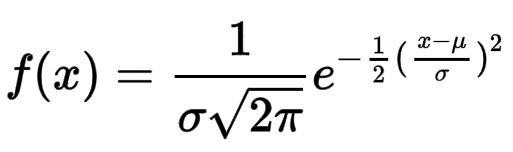

# **Naive Bayes Formula:**
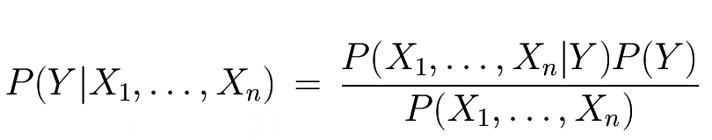

In [30]:
# Model creation using Probability Density Function with Training data
def pdf(x):
    prob = []
    probability = []
    for i in range(0,7):
        pdf1 = np.exp((-1/2)*((x-Mean[i])**2/(sd[i])**2)) # 1x6,finding pdf
        pdf2 = sd[i]*np.sqrt(2 * np.pi)
        pdf = pdf1 / pdf2 # 1x6 each column represent probability of corresponding features with a particular unique class 
        result = 1
        for j in pdf:
            result *= j   # 1x1 multiply each feature probability 
        result *= class_pdf()[i]    # 1x1 represents the probability of particular data point for a particular unique class
        prob.append(result)             # 1x7 each column represents probability of particular data point with corresponding unique class
    total = np.sum(prob)                    # 1x1 sum of all the probabilities of the data points
    probability=prob/total                      # 1x7 each column represent the final probability of that particular data point belonging to unique class 
        
    return probability       

In [31]:
X_test=np.delete(X_test,0,1)
# Function for predicting
def predict(X_test):
    Prediction = []
    for i in range(0,len(X_test)):
        class_pred = np.argmax(pdf(X_test[i])) #1x1 max probability gives which class that data point finally belongs.
        Prediction.append(class_pred) 
    return Prediction # X_test.shape[0]x1 final predicted unique class for the corresponding test data points

Training accuracy =  0.5905511811023622


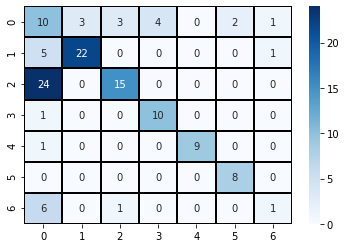

***********************************************************************************************************
Testing accuracy =  0.65625
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.67      0.33         3
           1       1.00      0.91      0.95        11
           2       1.00      0.10      0.18        10
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0

    accuracy                           0.66        32
   macro avg       0.70      0.67      0.61        32
weighted avg       0.91      0.66      0.65        32



C:\Users\ARUL GOUTHAM RAJU\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


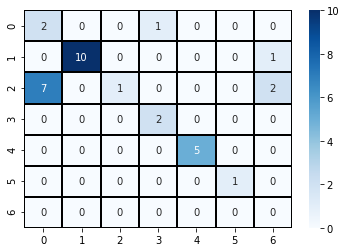

In [32]:
# Train Accuracy
x_train=X_train[:,1:] # removing the target column
ytrain_pred = predict(x_train)
print('Training accuracy = ',accuracy_score(ytrain_pred,y_train))
cm = confusion_matrix(ytrain_pred,y_train)
cm = pd.DataFrame(cm , index = ['0','1','2','3','4','5','6'] , columns = ['0','1','2','3','4','5','6'])
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.show()

print('***********************************************************************************************************') 

# Test Accuracy
ytest_pred = predict(X_test)
print('Testing accuracy = ',accuracy_score(ytest_pred,y_test))
print('Classification Report:\n',classification_report(ytest_pred,y_test))
cm1 = confusion_matrix(ytest_pred,y_test)
cm1 = pd.DataFrame(cm1 , index = ['0','1','2','3','4','5','6'] , columns = ['0','1','2','3','4','5','6'])
sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.show()

# 
# Comparing result with inbuilt function
# 

In [33]:
df1 = pd.read_csv('Data_Naive_Bayes.csv')
y=df1['Species']
X=df1.drop('Species',axis=1)
#X = (X - np.min(X)) / (np.max(X) - np.min(X)).values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,  test_size=0.2, shuffle=True, random_state=42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
y_pred

array(['Roach', 'Smelt', 'Perch', 'Roach', 'Roach', 'Bream', 'Smelt',
       'Roach', 'Roach', 'Pike', 'Bream', 'Bream', 'Bream', 'Parkki',
       'Bream', 'Bream', 'Perch', 'Roach', 'Roach', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Roach', 'Roach',
       'Smelt', 'Smelt', 'Pike', 'Roach'], dtype='<U9')

In [34]:
accuracy_score(y_test, y_pred)

0.65625